In [ ]:
#same as copy1, cleaning everything up so this code looks as nice as possible and can run with the quick addition of more
#detectors, whatever way they are put in

#Notes:  have good names, make sure they aren't confusing, any way to do this for multiple x's? May have to put while loop ^ and put detector underneath. 

In [1]:
%matplotlib notebook

#currently finding the min chi square of a 5 detector geometry with a source at any angle along this axis, 
#updating right now for a later iteration that will include another dimension, and should look like a flat topped pyramid
#can continuously add more and more detectors using this minimized chi square approach for localization. 


#Basic idea geometry of my design. 
#https://www.google.com/search?q=flat+topped+pyramid&espv=2&tbm=isch&imgil=uwDql0_0HUoCKM%253A%253BWdiKXRWuoUpmYM%253Bhttp%25253A%25252F%25252Fwww.conceptdraw.com%25252Fexamples%25252Ftriangle-pyr-stencil&source=iu&pf=m&fir=uwDql0_0HUoCKM%253A%252CWdiKXRWuoUpmYM%252C_&usg=__iKBQ_mWYpg_a4sJZLtXiaKvPf9w%3D&biw=1280&bih=703&dpr=2&ved=0ahUKEwiiv7W6wpDTAhWG5CYKHaICBiIQyjcILA&ei=0pDmWKKOFIbJmwGihZiQAg#imgrc=uwDql0_0HUoCKM:

import numpy as np
import matplotlib.pyplot as plt
import math as mth
import random as rand
import statistics as s
import healpy as hp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

In [2]:
#Some functions I used determine whether or not a signal could even be found in the detector

def length(v):
    return mth.sqrt(np.dot(v, v))

def angle(v1, v2):
    return mth.acos(np.dot(v1, v2) / (length(v1) * length(v2)))


Detector Tilt -30.0 degrees x -45.0 degrees
0.0 0.0 500


<IPython.core.display.Javascript object>


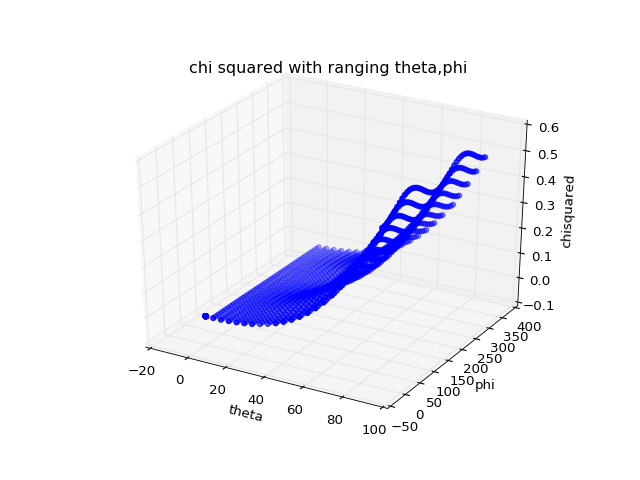

8.18181818182 112.0 500


<IPython.core.display.Javascript object>


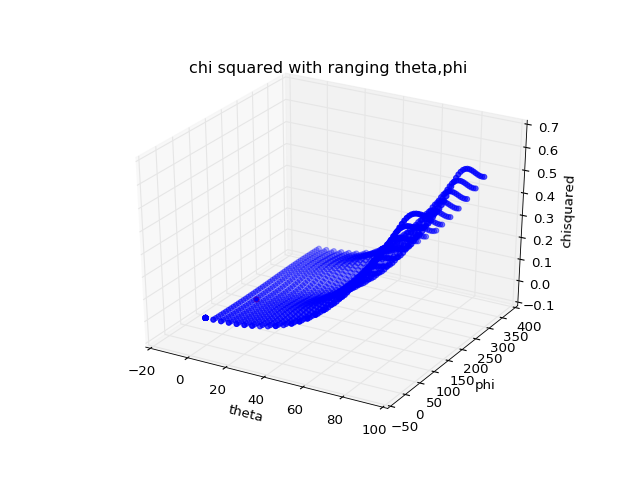

8.18181818182 0.0 500


<IPython.core.display.Javascript object>


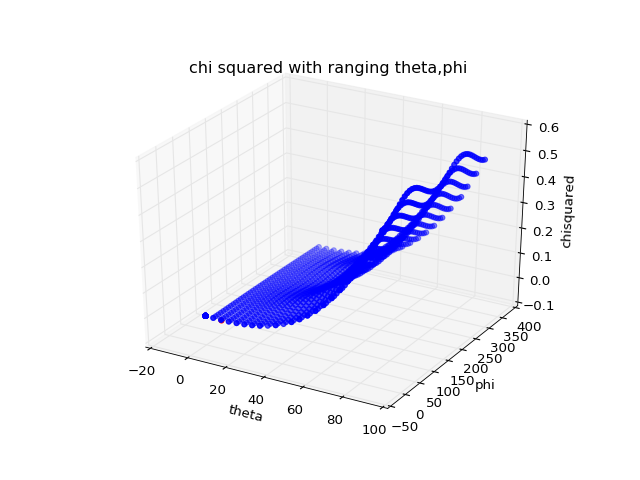

0.0 0.0 500


<IPython.core.display.Javascript object>


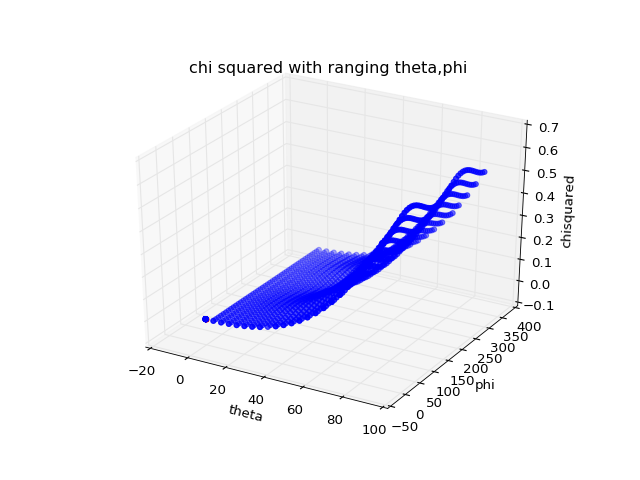

16.3636363636 352.0 500


<IPython.core.display.Javascript object>


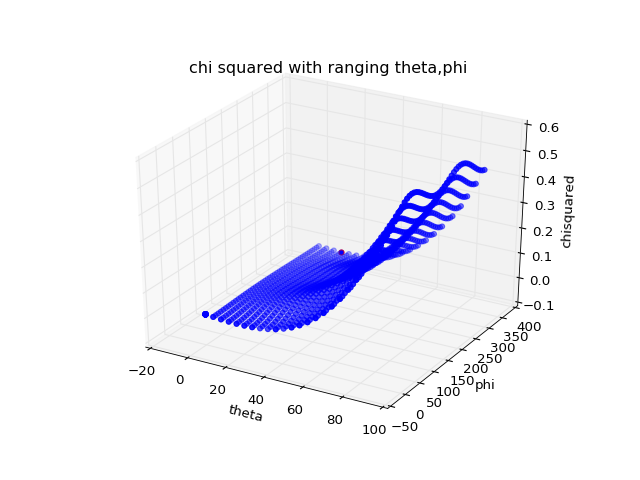

12.2727272727 80.0 500


<IPython.core.display.Javascript object>


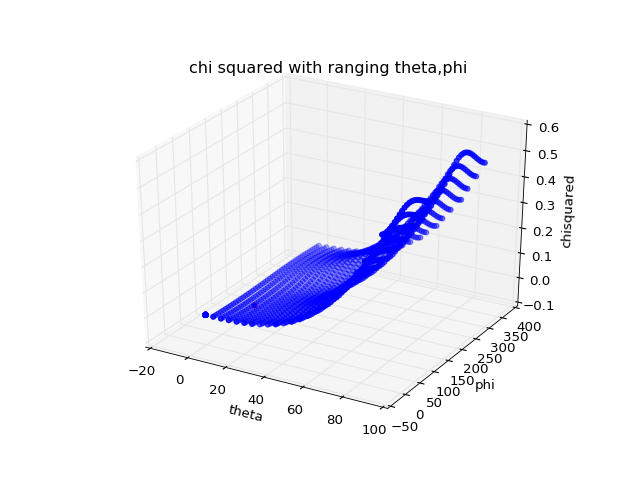

8.18181818182 216.0 500


<IPython.core.display.Javascript object>


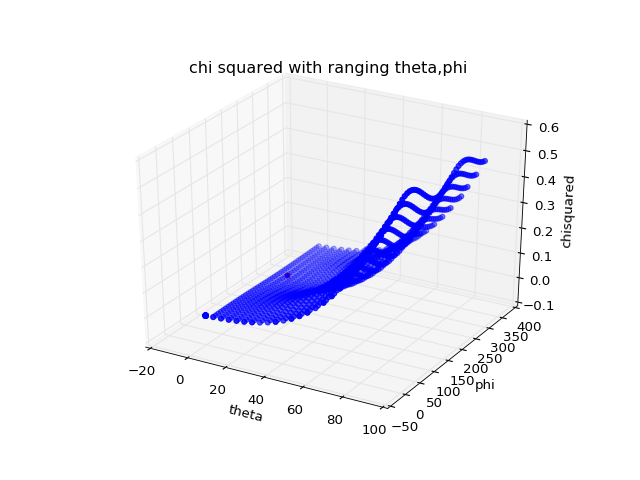

16.3636363636 280.0 500


<IPython.core.display.Javascript object>


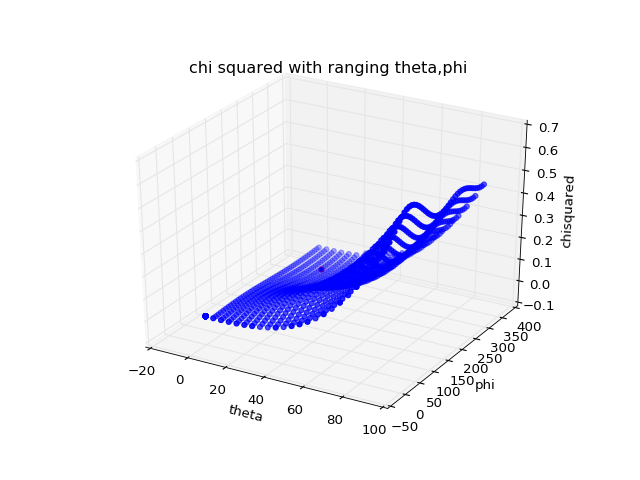

32.7272727273 360.0 500


<IPython.core.display.Javascript object>


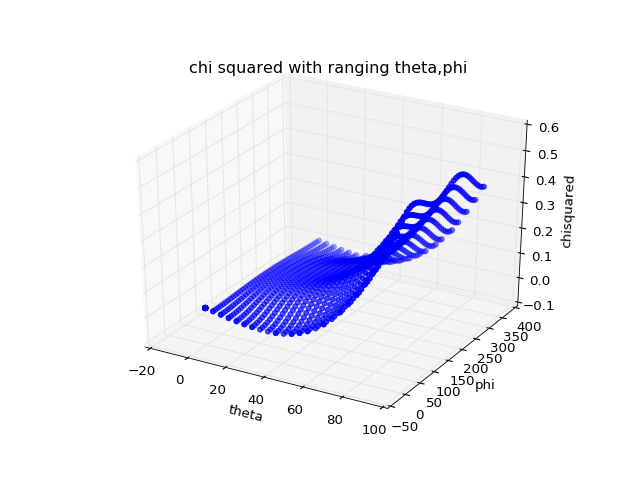

32.7272727273 80.0 500


<IPython.core.display.Javascript object>


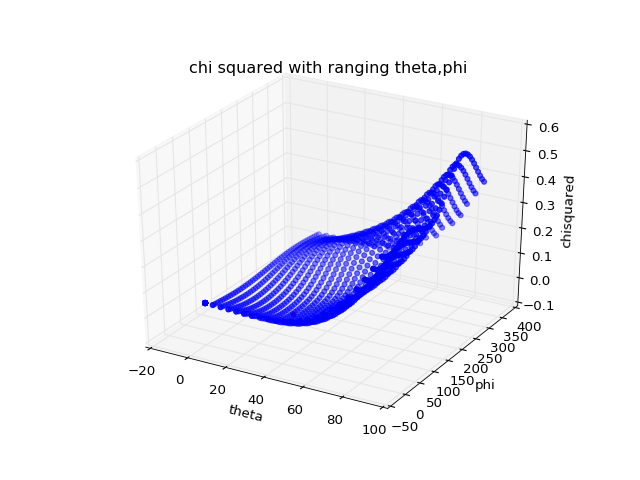

28.6363636364 168.0 500


<IPython.core.display.Javascript object>


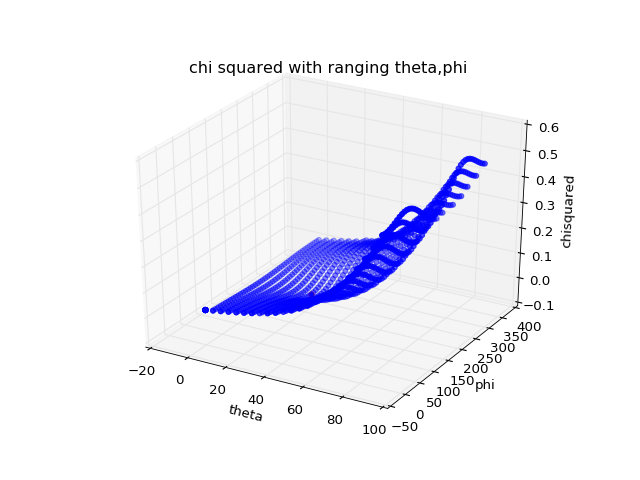

28.6363636364 304.0 500


<IPython.core.display.Javascript object>


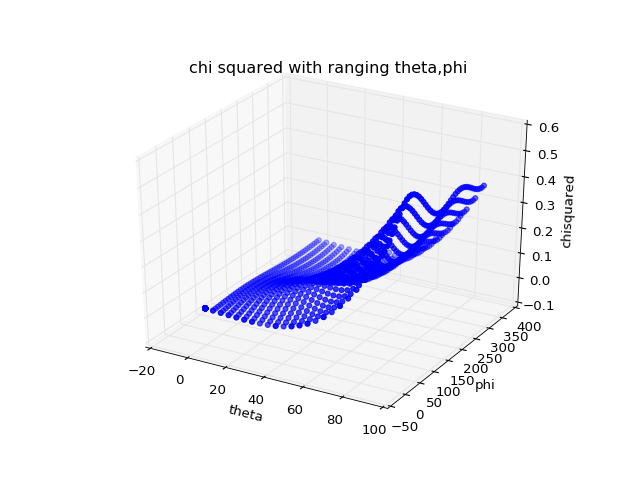

40.9090909091 352.0 500


<IPython.core.display.Javascript object>


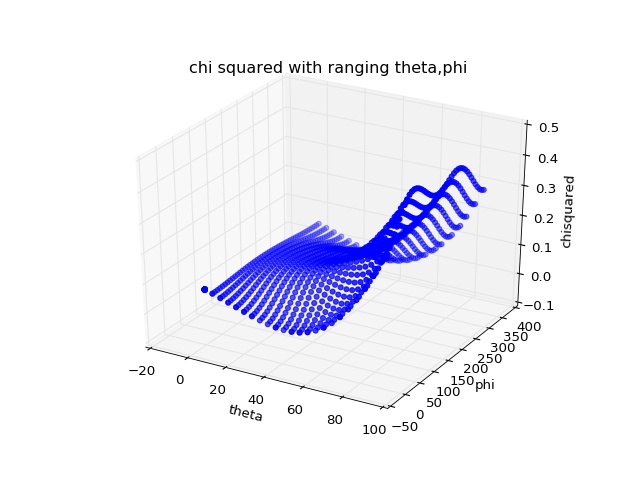

45.0 88.0 500


<IPython.core.display.Javascript object>


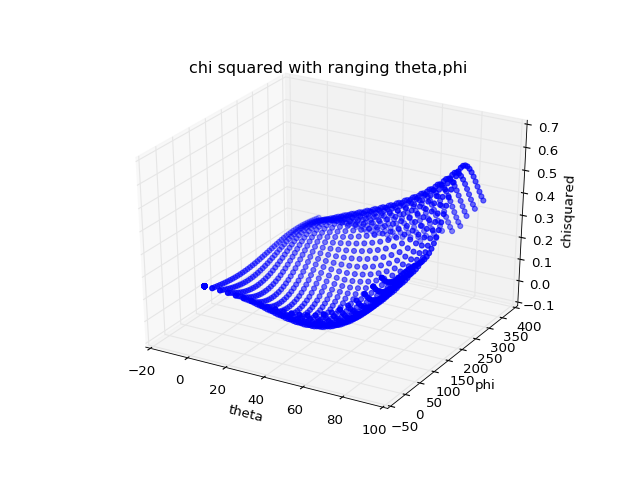

49.0909090909 176.0 500


<IPython.core.display.Javascript object>


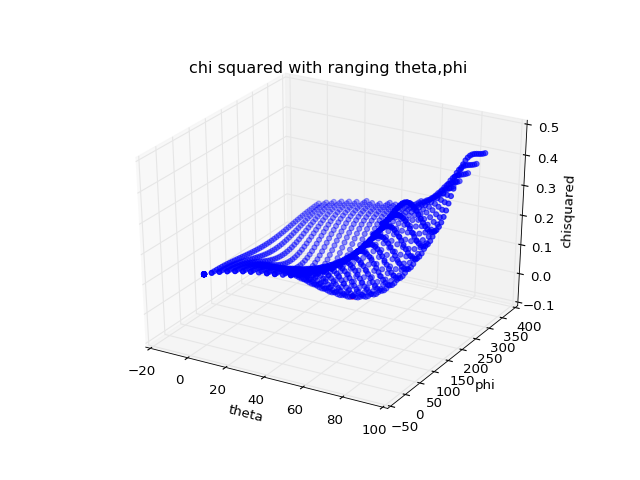

40.9090909091 272.0 500


<IPython.core.display.Javascript object>


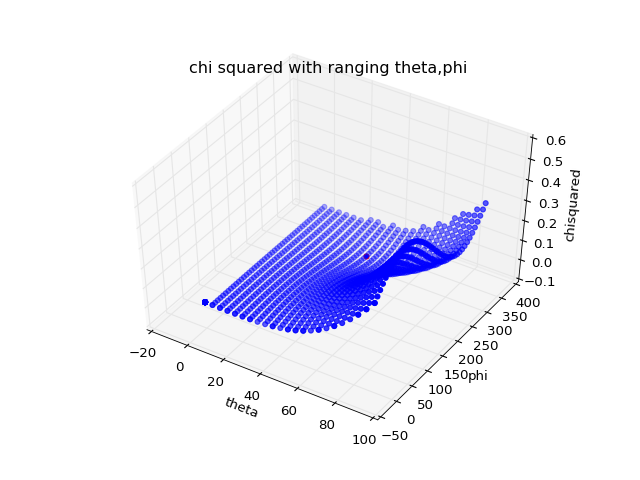

73.6363636364 360.0 500


<IPython.core.display.Javascript object>


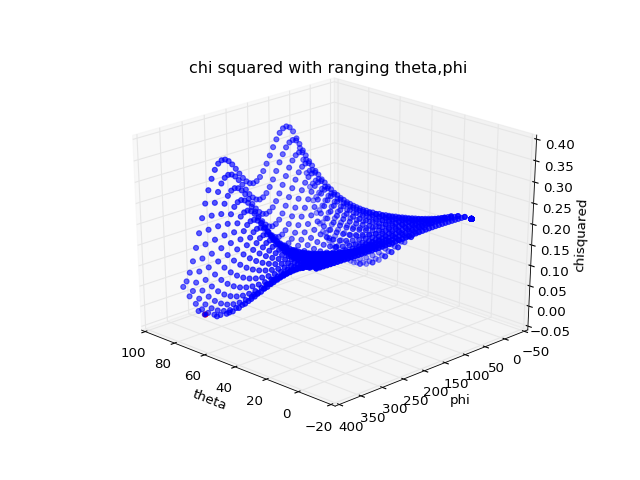

77.7272727273 96.0 500


<IPython.core.display.Javascript object>


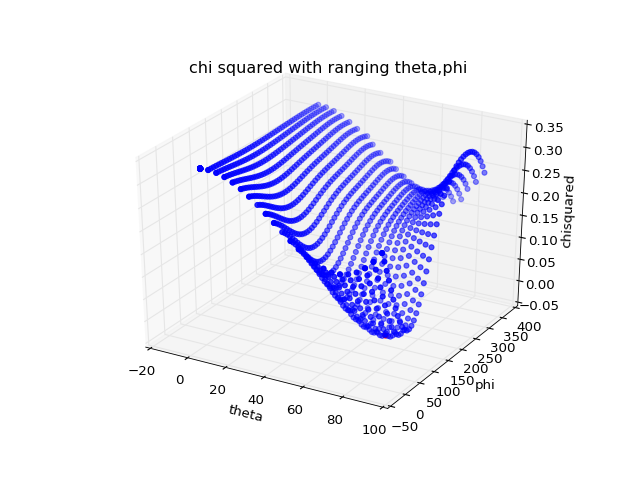

69.5454545455 176.0 500


<IPython.core.display.Javascript object>


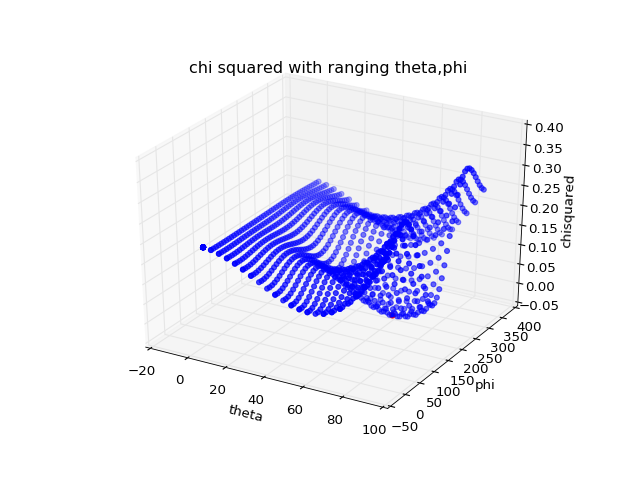

65.4545454545 272.0 500


<IPython.core.display.Javascript object>


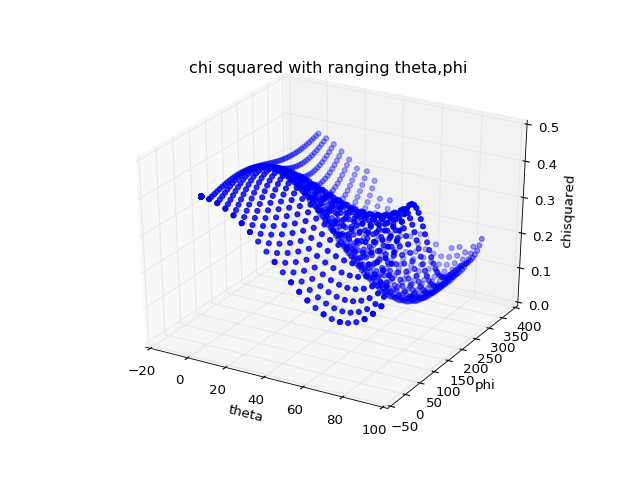

In [6]:
azimuth=[0,0]  #set azimuth of the system
tiltA=np.deg2rad(np.array([30]))   #the tilt from the flat plane (B) along one axis
thetaS=np.deg2rad(np.array([0,15,30,45,76]))   #currently set at the zenith , can change this in one direction but not both simultaneously (yet)
tiltD=np.deg2rad(np.array([45]))   #used for finding phi
phiS=np.deg2rad(np.array([0,90,180,270]))   #these are off
#use spherical coordinates for theta, phi 

#theta=0 is straight up, normal B is max, phi 

#theta: how far it is tipped down from the pole 

#phi, rotatikon along the z plane, can be anything so long at theta is 0. 
#phi runs from 0 to 2pi   

Ao=np.array([500]) #intensity of the signal 
bg=1000
error=[]
x = 1   #run through x times per setup
y=10 #whatever degree to uncertainty
for ja in range(len(tiltA)):   #run through the possible detector orientations
    #should include another loop starting here for the other tilt direciton (D)
    tiltB=0
    tiltC=tiltA[ja]
    dtilt1=-1*tiltA[ja]
    for jb in range(len(tiltD)): 
        print("Detector Tilt " + str(np.rad2deg(-tiltA[ja]))+ " degrees x " +str(np.rad2deg(-tiltD[jb]))+ " degrees")
        tiltE=tiltD[jb]
        dtilt2=-1*tiltD[jb]

        for k in range(len(Ao)):  #(optional) run through different signal strengths 
            sigma=[]    
            bias=[]
            eff = []   
            for ia in range(len(thetaS)):  #run through the possible source angles
                for ib in range(len(phiS)):
                    sourceang=[thetaS[ia],phiS[ib]]
                    sourcexyz = hp.ang2vec(sourceang[0],sourceang[1])
                    #normal vectors of each detector
                    Anorm = hp.ang2vec(azimuth[0]+tiltA[ja],azimuth[1])
                    Bnorm = hp.ang2vec(azimuth[0]+tiltB,azimuth[1])
                    Cnorm = hp.ang2vec(azimuth[0]+tiltC,azimuth[1]+np.pi)
                    Dnorm = hp.ang2vec(azimuth[0]+tiltD[jb],azimuth[1]+np.pi/2)
                    Enorm = hp.ang2vec(azimuth[0]+tiltE,azimuth[1]+1.5*np.pi)
                    
                    dets=[Anorm,Bnorm,Cnorm,Dnorm,Enorm]   #and whatever other detectors to be included!
                    
                    
                    #while up here, go through all below 
                    count=0
                    while count<x: 
                        
                        chisquareds = []
                        chiterms=[]
                        the = []
                        phi = []
                        confidence = []   #significant values 
                        for ii in range((len(dets))):
                            sep=angle(sourcexyz,dets[ii])                   
                        
                            if sep<np.pi: 
                                dexp=Ao[k]*np.dot(sourcexyz,dets[ii])  #expected number of counts in A
                            else:
                                dexp=0
                                print("Warning: expected signal not found in detector "+str(ii))
                            counts=max(dexp,0)+bg
                            unccounts=np.sqrt(counts)
                   
                            det=rand.gauss(counts,unccounts)
                            if det-bg<0:
                                det=0
                                print("Warning: no signal found in detector "+str(ii))
                   

                            oa=np.deg2rad(np.linspace(0,90,23))  #range of thetas to sample
                            ob=np.deg2rad(np.linspace(0,360,46)) #phi
                            Aofit=np.array([500])    #linspace(0,1000,25)  
                            for sa in range(len(oa)): 
                                for sb in range(len(ob)):
                                    for sc in range(len(Aofit)):
                                        CHIsourceang=[oa[sa],ob[sb]]
                                        CHIsourcexyz = hp.ang2vec(CHIsourceang[0],CHIsourceang[1])
            
                                    #some conditional about missing the detector here is necessary

                                        CHIsep=angle(CHIsourcexyz,dets[ii])                   
                        
                                        if CHIsep<np.pi: 
                                            chi=Aofit[sc]*np.dot(CHIsourcexyz,dets[ii])+bg
                                        else:
                                            chi=0               
                
                
                                        if det>0:   #if there is a signal in the detector 
                                            chiterm=((chi-det)/det)**2
                                        else:    #if not, just zero 
                                            chiterm=0
                                                                       
                                    
                                        chiterms.append(chiterm)   #this is an array of EVERY SINGLE term, need to split in pieces and add element by element... 
                       
                
                        a,b,c,d,e=np.array_split(chiterms,len(dets))
                        ab=np.add(a,b)
                        cd=np.add(c,d)
                        ad=np.add(ab,cd)
                        chisquareds=(np.add(ad,e))   #100% a better way to do this.  #define a function? 
                        chimin=np.amin(chisquareds)  
                        chisquareds=list(chisquareds)
                        thetaloc=np.rad2deg(oa[int((chisquareds.index(chimin)-(chisquareds.index(chimin) % (len(ob)*len(Aofit))))/(len(ob)*len(Aofit)))])
                        philoc=np.rad2deg(ob[int(((chisquareds.index(chimin) % (len(ob)*len(Aofit)))-(chisquareds.index(chimin) % (len(Aofit))))/len(Aofit))])
                        Aoguess=Aofit[int((chisquareds.index(chimin) % (len(ob)*len(Aofit)))  % len(Aofit))]
                        print(thetaloc,philoc,Aoguess)  #Aoguess is typically an array, can be easily changed to such
                        for ai in range(len(chisquareds)):
                            if chisquareds[ai]<chimin+y:
                                confidence.append(chisquareds[ai])
                        
                        for aj in range(len(confidence)):
                            the.append(np.rad2deg(oa[int((chisquareds.index(confidence[aj])-(chisquareds.index(confidence[aj]) % (len(ob)*len(Aofit))))/(len(ob)*len(Aofit)))]))
                            phi.append(np.rad2deg(ob[int(((chisquareds.index(confidence[aj]) % (len(ob)*len(Aofit)))-(chisquareds.index(confidence[aj]) % (len(Aofit))))/len(Aofit))]))
                        
                        fig = plt.figure()
                        ax = fig.gca(projection='3d')

                        ax.scatter(the,phi,confidence,color='b')
                        ax.scatter(thetaloc,philoc,chimin,color='r')
                        ax.set_xlabel('theta')
                        ax.set_ylabel('phi')
                        ax.set_zlabel('chisquared')
                        ax.set_title('chi squared with ranging theta,phi')
                        
                        count+=1

In [ ]:
len(chisquareds)

In [ ]:
X = the #all of the thetas within confidence
Y = phi #phis within confidence
X, Y = np.meshgrid(the, phi)
Z = confidence


In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=1, antialiased=False)

ax.scatter(the,phi,Z,color='b')
ax.scatter(thetaloc,philoc,chimin,color='r')
ax.set_xlabel('theta')
ax.set_ylabel('phi')
ax.set_zlabel('chisquared')
ax.set_title('chi squared with ranging theta,phi')

In [ ]:
#BONUS: 3d reconstruction of the confidence, would obviously prefer this on a mollewide projection with contours for
#confidence levels, working on that now


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
consource = []
#pix = []
for wa in range(len((the))):
    consource=([the[wa],phi[wa]])
    consourcexyz=hp.ang2vec(np.deg2rad(consource[0]),np.deg2rad(consource[1]))
    axs=1e9*consourcexyz[0]
    ays=1e9*consourcexyz[1]
    azs=1e9*consourcexyz[2] 
    ax.scatter(axs,azs,ays,color='b')   #note y and z are flipped!  Did this so as soon as the plot is loaded it is 
    #easier to visualize
s = []
for wb in range(len((Thetaloc))):
    s=([Thetaloc[wb],Philoc[wb]])
    sourxyz=hp.ang2vec(np.deg2rad(s[0]),np.deg2rad(s[1]))
    xs=sourxyz[0]
    ys=sourxyz[1]
    zs=sourxyz[2]
    ax.scatter(xs, zs, ys,color='r')   #note y and z are flipped! 
ax.scatter(0,0,0,color='r')

In [ ]:
len(chisquareds)

In [ ]:
len(oa)*len(ob)

In [ ]:
#NEXT UP: Fix hard coding nature of code, make everything run through detector by detector, 


np.add([1,1,2],[2,2,2])

In [ ]:
np.add([1,1,1],[2,2,2])